In [38]:
import geopandas as gpd
from rasterio import features, Affine
from rasterio.plot import show
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
from pylusat.utils import rasterize_geometry

In [41]:
streets_gdf = gpd.read_file("./../pylusat/datasets/streets/streets.shp")

In [47]:
streets_arr = rasterize_geometry(streets_gdf, 20)

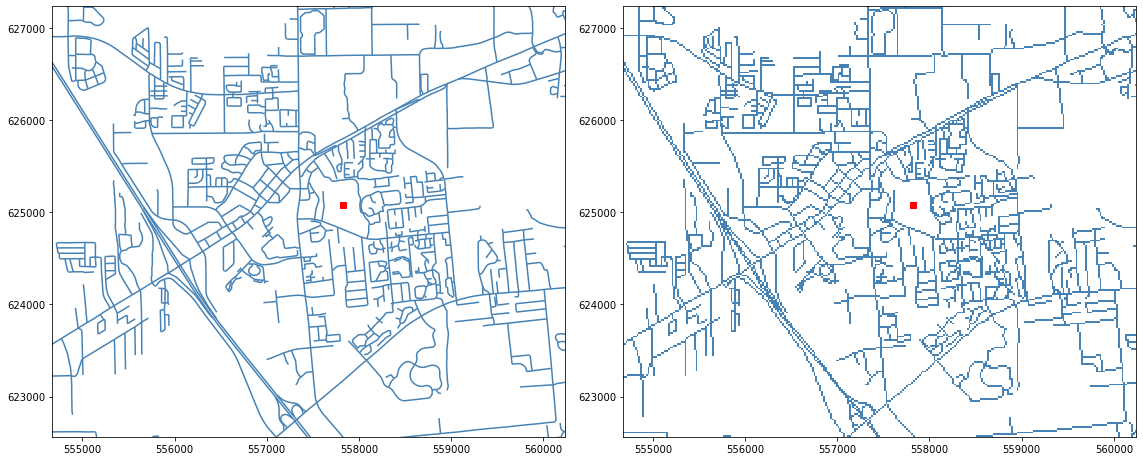

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

left, right, bottom, top = 554676, 560239, 622563, 627232
spot_x, spot_y = 557824, 625077

for ax in axes:
    ax.set_xlim(left, right)
    ax.set_ylim(bottom, top)
    ax.plot(spot_x, spot_y, 'rs')

streets_gdf.plot(ax=axes[0], color='steelblue')

levels = [0, 1, 2]
colors = ['white', 'steelblue']
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)

show(streets_arr[0], cmap=cmap, ax=axes[1], transform=streets_arr[1])

plt.tight_layout()

fig.savefig("./line_dist_example.png", dpi=300)